## 1. Import Standard Libraries

In [1]:
from IPython import display

import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional  as F

## 2. Get the Data

In [5]:
mnist_train = pd.read_csv(r"MNIST_dataset\mnist_train.csv")
mnist_test = pd.read_csv(r"MNIST_dataset\mnist_test.csv")

In [6]:
mnist_train.head(3)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
mnist_train.shape

(60000, 785)

In [8]:
mnist_test.tail(3)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9999,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
mnist_test.shape

(10000, 785)

#### Merging Train and Test DF

In [10]:
mnist = pd.concat([mnist_train,mnist_test])

In [11]:
mnist.head(3)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
mnist.tail(3)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9999,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
mnist.shape

(70000, 785)

#### Exporting

In [ ]:
mnist.to_csv("Mnist_combined.csv")

## 3. Convert the Data into Tensor Dataset

In [14]:
X = mnist.drop(labels = "label" ,axis = 1)
Y = mnist["label"]

In [15]:
data_np = X.to_numpy()
labels_np = Y.to_numpy()

In [16]:
data_np[0].shape

(784,)

In [17]:
labels_np.shape

(70000,)

In [18]:
# normalize the data to a range of [0 1]
dataNorm = data_np / np.max(data_np)

In [19]:
dataNorm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Hist- visualization

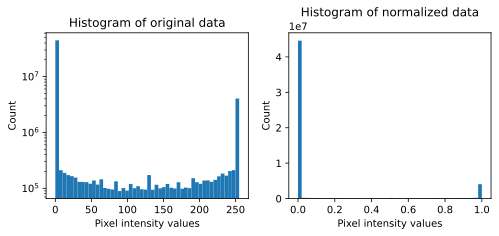

In [20]:
fig,ax = plt.subplots(1,2,figsize=(8,3) ,dpi = 130 )

ax[0].hist(data_np.flatten(),50)
ax[0].set_xlabel('Pixel intensity values')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram of original data')
ax[0].set_yscale("log")

ax[1].hist(dataNorm.flatten(),50)
ax[1].set_xlabel('Pixel intensity values')
ax[1].set_ylabel('Count')
ax[1].set_title('Histogram of normalized data')

plt.show()

#### Converting Numpy array to Pytorch Array

In [21]:
# convert to a pytorch tensor
data = torch.tensor(data_np).float()

# Note: "long" format for CCE : Multiclass classification
labels = torch.tensor(labels_np).long() 

#### Train and Test Loader

In [22]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset

In [23]:
# scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(data, labels, test_size=.1)

# convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

# finally, translate into dataloader objects

batchsize    = 64
train_loader = DataLoader(train_data, batch_size=batchsize, shuffle=True  ,drop_last=True)
test_loader  = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0] ) 

#### Checking all the variables in the Workspace

In [24]:
%whos

Variable            Type             Data/Info
----------------------------------------------
DataLoader          type             <class 'torch.utils.data.dataloader.DataLoader'>
F                   module           <module 'torch.nn.functio<...>orch\\nn\\functional.py'>
TensorDataset       type             <class 'torch.utils.data.dataset.TensorDataset'>
X                   DataFrame              1x1  1x2  1x3  1x4 <...>70000 rows x 784 columns]
Y                   Series           0       5\n1       0\n2  <...>ngth: 70000, dtype: int64
ax                  ndarray          2: 2 elems, type `object`, 16 bytes
batchsize           int              64
data                Tensor           tensor([[0., 0., 0.,  ...<...>, 0.,  ..., 0., 0., 0.]])
dataNorm            ndarray          70000x784: 54880000 elems, type `float64`, 439040000 bytes (418.701171875 Mb)
data_np             ndarray          70000x784: 54880000 elems, type `int64`, 439040000 bytes (418.701171875 Mb)
display             m

## 4. Create and validate the model

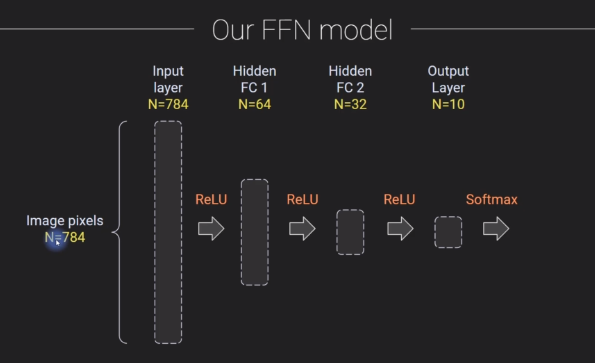

In [25]:
# create a class for the model
def createTheMNISTNet(LR):

    class MNISTNet(nn.Module):
        
        def __init__(self):
            super().__init__()

            ### Input layer
            self.input = nn.Linear(784,64)

            ### Hidden layer-1
            self.fc1 = nn.Linear(64,32)
            
            ### Hidden Layer-2
            self.fc2 = nn.Linear(32,32)

            ### Output layer
            self.output = nn.Linear(32,10)

        # forward pass
        def forward(self,x):
            
            # Input  Layer
            x = F.relu( self.input(x) ) 
            # Hidden Layer-1
            x = F.relu( self.fc1(x) )
            # Hidden Layer-2
            x = F.relu(self.fc2(x))
            
            return torch.log_softmax( self.output(x),axis=1 )
        
    # create the model instance
    ANN_model = MNISTNet()

    # loss function : Negative Log-Likelihood Loss function
    lossfunc = nn.NLLLoss()

    # optimizer
    optimizer = torch.optim.SGD(ANN_model.parameters(),lr=LR)

    return ANN_model,lossfunc,optimizer

In [26]:
# test the model with fake input

test_model , lf , opt = createTheMNISTNet(LR = 0.01)
#print(test_model)

# input is ten samples
testinput = torch.rand(2,784)
test_model(testinput)

# Values are : log prob of each of ten digits.

tensor([[-2.4034, -2.1013, -2.4132, -2.1999, -2.2541, -2.3872, -2.2879, -2.2247,
         -2.4297, -2.3810],
        [-2.3691, -2.0921, -2.4382, -2.2148, -2.2733, -2.3966, -2.2636, -2.2247,
         -2.4328, -2.3789]], grad_fn=<LogSoftmaxBackward0>)

## 5. Model Training

In [27]:
def function2trainTheModel(Model , lossfunc , optimizer ,train_loader , test_loader , epochs):

    losses   = torch.zeros(epochs)
    trainAcc = []
    testAcc  = []

    # loop over epochs
    for epochi in range(epochs):

        # switch on training mode
        Model.train()

        # loop over training data batches
        batchAcc  = []
        batchLoss = []
    
        # Batch Training
        for X,y in train_loader:

            # Forward pass and loss
            yHat_train = Model(X)
            loss = lossfunc(yHat_train,y)

            # Backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Loss from this batch
            batchLoss.append(loss.item())

            # Compute accuracy
            matches = torch.argmax(yHat_train,axis=1) == y     # booleans (false/true)
            matchesNumeric = matches.float()             # convert to numbers (0/1)
            accuracyPct = 100*torch.mean(matchesNumeric) # average and x100 
            batchAcc.append( accuracyPct )               # add to list of accuracies
        # End of batch loop...

        # Now that we've trained through the batches, get their average training accuracy
        trainAcc.append( np.round(np.mean(batchAcc),2 ))

        # Get average losses across the batches
        losses[epochi] = np.round(np.mean(batchLoss),2)

        # test accuracy
        Model.eval()
        X,y = next(iter(test_loader)) # extract X,y from test dataloader
        with torch.no_grad():         # deactivates autograd
            yHat_test = Model(X)
      
        # compare the following really long line of code to the training accuracy lines
        testAcc.append( np.round(100*torch.mean((torch.argmax(yHat_test,axis=1)==y).float()),2 ) )
        # End epochs

    # function output
    return trainAcc,testAcc,losses,Model


## 6.  Run the model and plot the results

In [28]:
ANN_model,lossfunc,optimizer = createTheMNISTNet(LR = 0.01)

In [29]:
# 10 mins time it took 
TrainAcc,TestAcc,Losses,trained_Model = function2trainTheModel(Model = ANN_model , 
                                                               lossfunc = lossfunc , 
                                                               optimizer  = optimizer,
                                                               train_loader = train_loader , 
                                                               test_loader  =  test_loader, 
                                                               epochs = 50)

## 7. Results Visualization

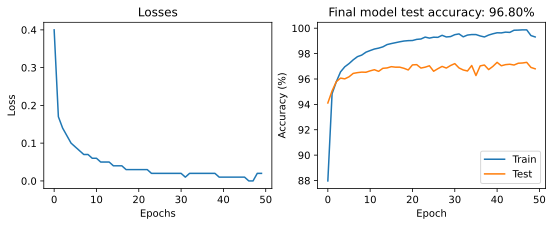

In [30]:
fig,ax = plt.subplots(1,2,figsize=(9,3))

ax[0].plot(Losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_title('Losses')

ax[1].plot(TrainAcc,label='Train')
ax[1].plot(TestAcc, label='Test')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title(f'Final model test accuracy: {TestAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

## 8. Inspect the results in more detail

In [31]:
# run the model through for the test data
X,y = next(iter(test_loader))
predictions = trained_Model(X).detach()

predictions # Log-Prob

tensor([[-47.3362, -42.2261, -38.1139,  ..., -23.1716, -31.4331, -36.4615],
        [-33.5678, -46.9705, -51.8189,  ..., -62.3819, -41.7460, -38.3556],
        [-21.5230, -35.5374, -40.1152,  ..., -49.4077, -34.9385, -33.2637],
        ...,
        [  0.0000, -43.0031, -50.7469,  ..., -27.0125, -40.9137, -30.1740],
        [-78.1929, -62.1052, -56.5248,  ..., -41.7240, -56.7740, -51.7521],
        [-21.8184, -16.9930, -16.0073,  ..., -15.8800,  -0.7258, -17.7140]])

In [33]:
predictions[0]

tensor([-47.3362, -42.2261, -38.1139,   0.0000, -58.6303, -26.9440, -64.2600,
        -23.1716, -31.4331, -36.4615])

In [34]:
# Taking exponential of Log-Prob
torch.exp(predictions[0]) 

tensor([2.7678e-21, 4.5858e-19, 2.8012e-17, 1.0000e+00, 3.4451e-26, 1.9877e-12,
        1.2366e-28, 8.6438e-11, 2.2324e-14, 1.4621e-16])

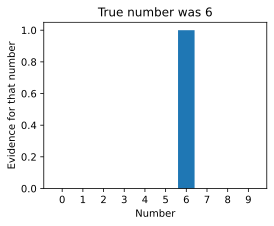

In [38]:
# Evidence for all numbers from one sample

sample2show = 120

plt.figure(figsize = (4,3) ,dpi =135)
plt.bar(range(10),torch.exp(predictions[sample2show]) ) 

plt.xticks(range(10))
plt.xlabel('Number')
plt.ylabel('Evidence for that number')
plt.title('True number was %s' %y[sample2show].item())

plt.show()

## 9. Find the Errors

In [39]:
y

tensor([3, 6, 6,  ..., 0, 3, 8])

In [46]:
predictions[0]

tensor([-47.3362, -42.2261, -38.1139,   0.0000, -58.6303, -26.9440, -64.2600,
        -23.1716, -31.4331, -36.4615])

In [40]:
torch.max(predictions,axis=1)

torch.return_types.max(
values=tensor([ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000, -0.6617]),
indices=tensor([3, 6, 6,  ..., 0, 3, 3]))

In [44]:
torch.max(predictions,axis=1)[1]

tensor([3, 6, 6,  ..., 0, 3, 3])

In [43]:
torch.max(predictions,axis=1)[1] != y

tensor([False, False, False,  ..., False, False,  True])

In [45]:
np.where( torch.max(predictions,axis=1)[1] != y )
# Indices where predictions and true values are not equal

(array([  48,   69,  107,  141,  153,  162,  180,  209,  243,  265,  290,
         355,  362,  383,  440,  445,  458,  459,  463,  477,  501,  531,
         567,  583,  597,  617,  627,  694,  727,  766,  796,  807,  843,
         875,  905,  959,  963, 1013, 1017, 1031, 1105, 1106, 1167, 1194,
        1196, 1241, 1270, 1277, 1340, 1485, 1518, 1539, 1582, 1615, 1734,
        1790, 1809, 1822, 1830, 1836, 1857, 1864, 1877, 1896, 1923, 1932,
        1998, 2014, 2027, 2041, 2096, 2097, 2143, 2255, 2258, 2273, 2294,
        2297, 2313, 2364, 2387, 2405, 2488, 2629, 2654, 2658, 2677, 2715,
        2722, 2723, 2738, 2793, 2801, 2868, 2917, 2930, 2962, 3011, 3012,
        3024, 3075, 3096, 3108, 3189, 3235, 3292, 3293, 3325, 3391, 3422,
        3457, 3495, 3502, 3512, 3594, 3633, 3696, 3764, 3770, 3801, 3849,
        3877, 3904, 3907, 3953, 3978, 4026, 4042, 4047, 4097, 4112, 4115,
        4130, 4183, 4232, 4277, 4281, 4286, 4305, 4422, 4433, 4439, 4453,
        4482, 4512, 4519, 4531, 4539, 

#### Indices where errors in predictions occured

In [60]:
errors_indices = np.where( torch.max(predictions,axis=1)[1] != y )[0]
print(errors_indices)

[  48   69  107  141  153  162  180  209  243  265  290  355  362  383
  440  445  458  459  463  477  501  531  567  583  597  617  627  694
  727  766  796  807  843  875  905  959  963 1013 1017 1031 1105 1106
 1167 1194 1196 1241 1270 1277 1340 1485 1518 1539 1582 1615 1734 1790
 1809 1822 1830 1836 1857 1864 1877 1896 1923 1932 1998 2014 2027 2041
 2096 2097 2143 2255 2258 2273 2294 2297 2313 2364 2387 2405 2488 2629
 2654 2658 2677 2715 2722 2723 2738 2793 2801 2868 2917 2930 2962 3011
 3012 3024 3075 3096 3108 3189 3235 3292 3293 3325 3391 3422 3457 3495
 3502 3512 3594 3633 3696 3764 3770 3801 3849 3877 3904 3907 3953 3978
 4026 4042 4047 4097 4112 4115 4130 4183 4232 4277 4281 4286 4305 4422
 4433 4439 4453 4482 4512 4519 4531 4539 4558 4586 4612 4654 4772 4790
 4826 4829 4839 4892 4894 4895 4916 5119 5143 5165 5203 5302 5348 5363
 5440 5443 5583 5638 5644 5665 5693 5694 5734 5757 5785 5813 5814 5888
 5927 5944 5965 5987 5993 6009 6037 6049 6076 6080 6149 6163 6199 6207
 6237 

#### Evidence for some selected errors.

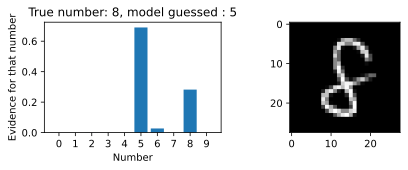

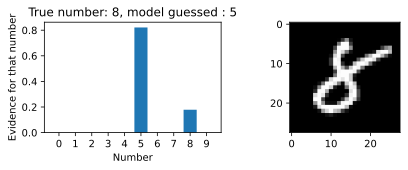

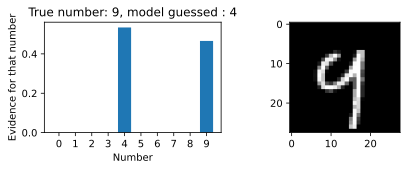

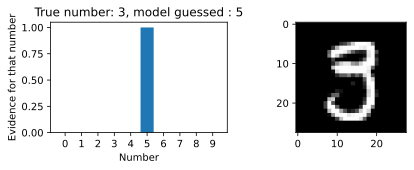

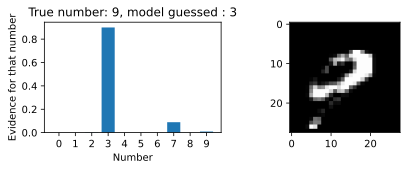

In [61]:
indices_rand  = random.choice(errors_indices, size = (5) , replace=False)

for idx in indices_rand: 

    fig,ax = plt.subplots(1,2,figsize=(7,2) ,dpi = 150)

    ax[0].bar(range(10),np.exp(predictions[idx]))
    
    ax[0].set_xticks(range(10))
    ax[0].set_xlabel('Number')
    ax[0].set_ylabel('Evidence for that number')
    
    ax[0].set_title(f'True number: {y[idx].item()}, model guessed : {torch.argmax(predictions[idx]).item()}') 
                    

    ax[1].imshow( np.reshape(X[idx,:],(28,28)) ,cmap='gray')

    plt.show()

In [90]:
data_test = data_np[:5].copy()

In [93]:
np.where(data_test>0, 1, 0)[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,